In [ ]:
import numpy as np 
import cv2 
from google.colab.patches import cv2_imshow
!wget https://pythonprogramming.net/static/images/opencv/people-walking.mp4



--2020-05-31 23:44:43--  https://pythonprogramming.net/static/images/opencv/people-walking.mp4
Resolving pythonprogramming.net (pythonprogramming.net)... 104.237.143.20, 2600:3c00::f03c:91ff:fe84:176d
Connecting to pythonprogramming.net (pythonprogramming.net)|104.237.143.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8649411 (8.2M) [video/mp4]
Saving to: ‘people-walking.mp4’

people-walking.mp4  100%[===================>]   8.25M  27.4MB/s    in 0.3s    

2020-05-31 23:44:44 (27.4 MB/s) - ‘people-walking.mp4’ saved [8649411/8649411]



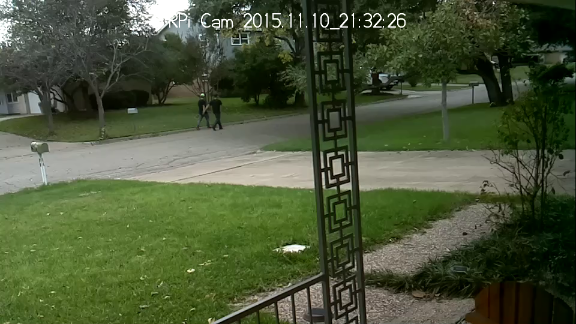

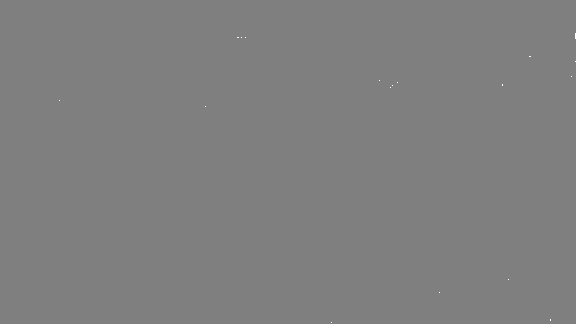

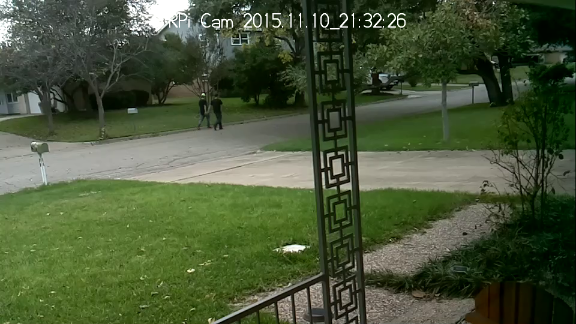

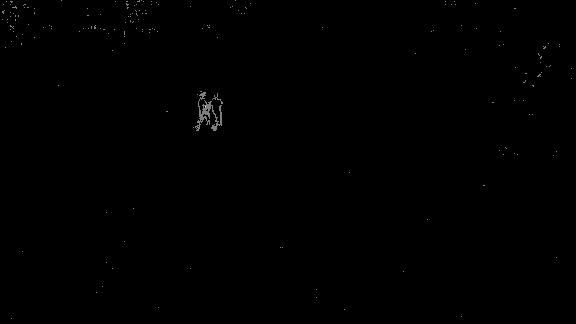

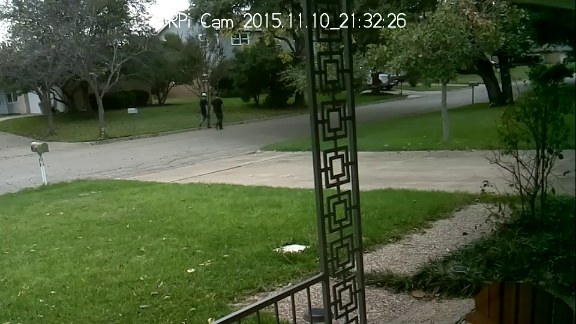

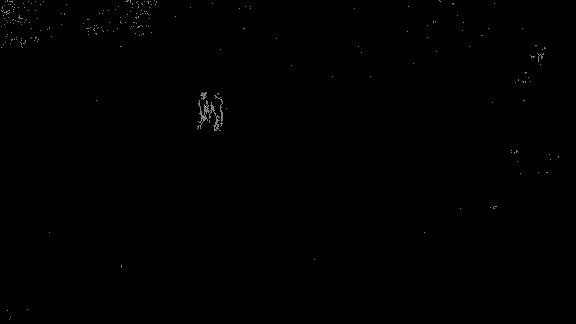

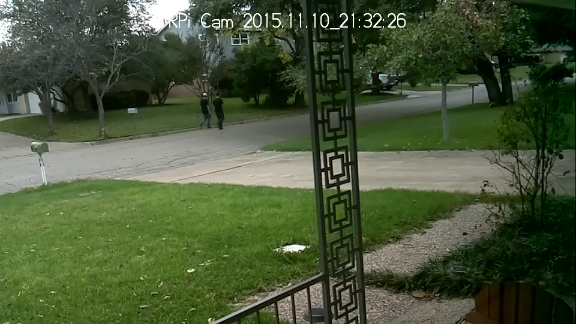

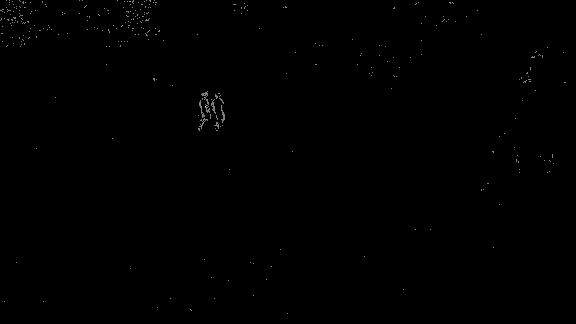

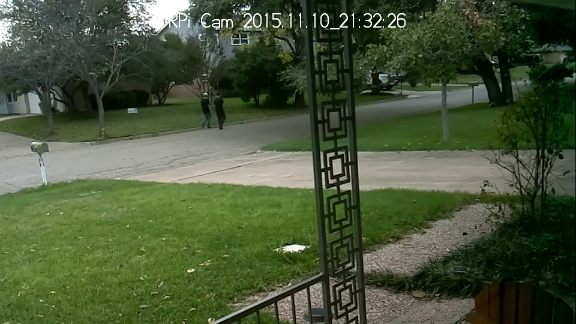

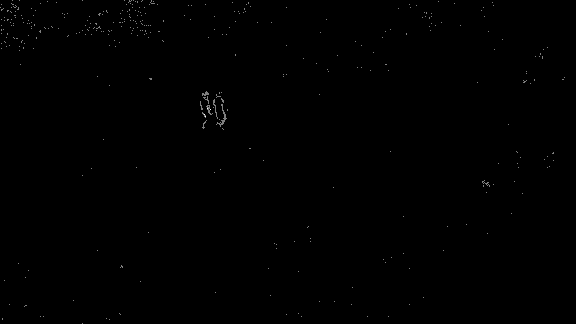

In [ ]:
cap = cv2.VideoCapture('people-walking.mp4') 

fgbg = cv2.createBackgroundSubtractorMOG2() 

#ret, BG = cap.read() 
#BG = cv2.cvtColor(BG, cv2.COLOR_BGR2GRAY)

#kernel = np.ones((5,5),np.uint8)

for i in range(5): 
    ret, frame = cap.read() 
    frame = cv2.resize(frame, None,fx=0.6,fy=0.6)

    # frame= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    fgmask = fgbg.apply(frame) 

    #fgmask = cv2.dilate(fgmask, kernel, iterations=1)

    cv2_imshow(frame) 
    cv2_imshow(fgmask)       
  
cap.release() 


## Agora é a sua vez
Modifique o notebook acima para que implemente um modelo de *subtração adaptativa de background*, conforme visto em sala de aula.  As linhas comentadas que contém *BG e cv2.cvtColor* dão um pontapé inicial nesta direção.  Lembre-se de remover as linhas que utilizam o modelo de subtração de background MOG2.

### ***Atividade Bonus***
Utilize morfologia matemática (erosão e dilatação) para filtrar os ruídos de background e melhorar a definição da área dos objetos em movimento.  Há 2 linhas comentadas no código (*kernel = np.opes*, *cv2.dilate*) que tratam da melhoria da definição dos objetos em movimento, mas não trata o ruído de background. Veja como pode melhorar a imagem segmentada de uma forma geral.

Seguindo o algorimo indicado nos slides, implementou-se uma estrutura de repetição que detecta diferenças presentes em quadros sequenciais. 

B é o quadro lido no momento anterior. Quanto inicia-se o laço, o frame subsequente é lido. É feita uma subtração entre estes e aplica-se um treshold aos valores resultantes da subtração. Encontrei que um treshold de 10 resultava em uma melhor definição do contorno das pessoas. 

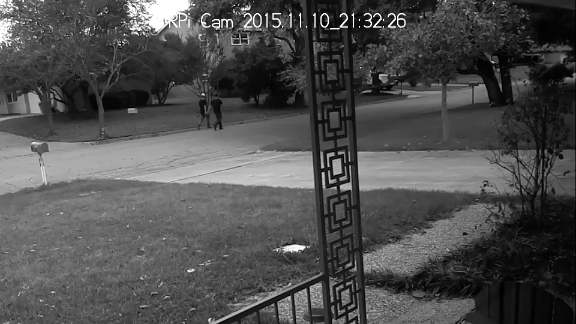

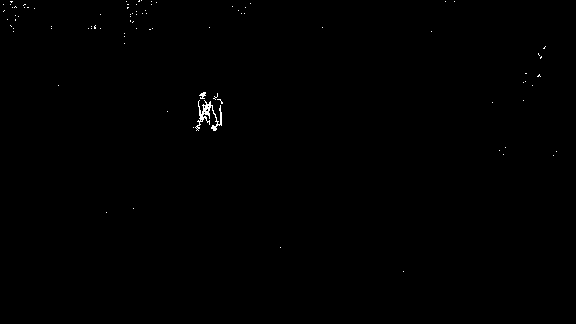

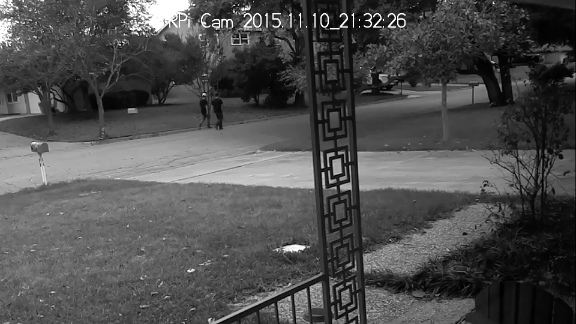

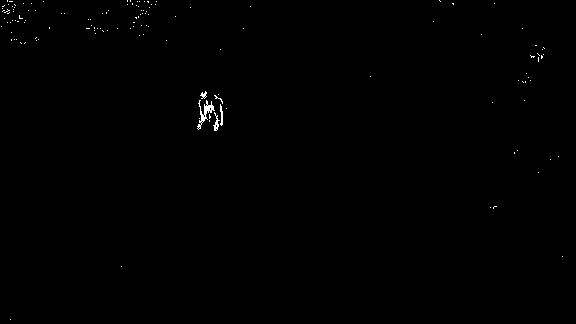

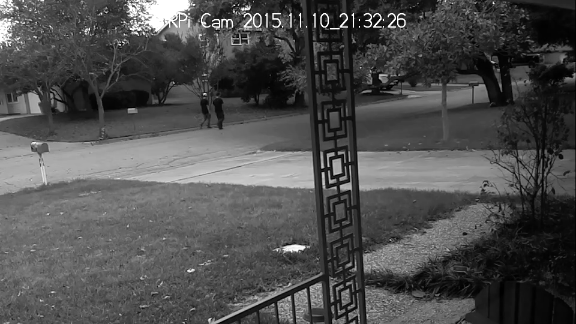

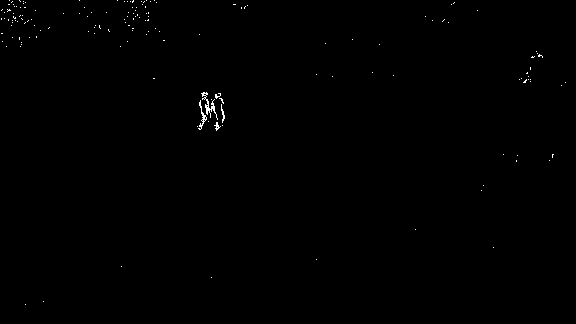

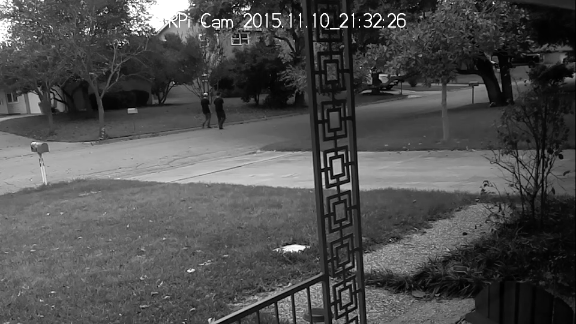

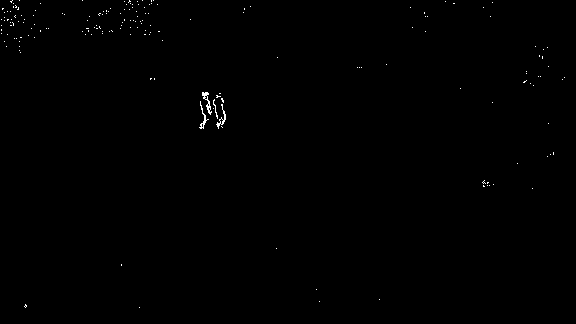

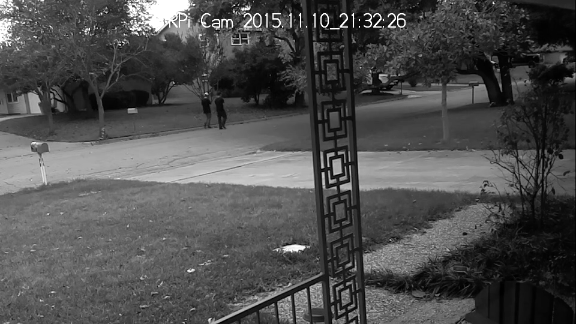

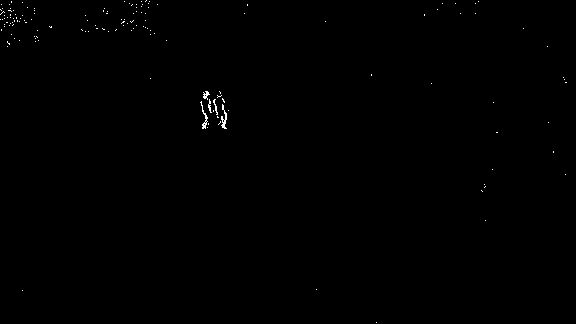

In [ ]:
cap = cv2.VideoCapture('people-walking.mp4') 

ret, B = cap.read()
B = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
B = cv2.resize(B, None,fx=0.6,fy=0.6)
alfa = 1
for i in range(5): 
    ret, frame = cap.read() 
    frame = cv2.resize(frame, None,fx=0.6,fy=0.6)
    frame= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(frame, B)
 
    
    for row in range(diff.shape[0]):
      for col in range(diff.shape[1]):
        if diff[row][col] > 10:
          diff[row][col] = 255
        else:
          diff[row][col] = 0
    B = alfa*frame + (1-alfa)*B


    cv2_imshow(frame) 
    cv2_imshow(diff)       
  
cap.release() 

In [ ]:
frame-frame

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
count = 0
for row in range(diff.shape[0]):
  for col in range(diff.shape[1]):
    if diff[row][col] > 10:
      diff[row][col] = 255
    else:
      diff[row][col] = 0
print(diff)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
324*576

186624

In [ ]:
imask.shape

(324, 576)